# Titanic - Machine Learning from Disaster - Accuracy Score - 84

### Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Train Data

In [2]:
titanic_train = pd.read_csv("data/Titanic - Machine Learning from Disaster/train.csv")
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Remove Columns Not Required for Ananlysis

In [3]:
titanic_train.drop(labels=["PassengerId", "Name", "Ticket", "Fare", "Cabin"], axis=1, inplace=True)

In [4]:
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


### Remove Null Data and Fill Age based on SibSp and Parc
To file the `Age` we can estimate it based on numbers of `SibSp` and `Parch` and if they have it or not. The reason we are doing this is because our test set has `Age` with `NaN` and we don't want to remove it. So to populate the `Age` on test set we need a logic.

In [5]:
# Checksum Null Values
titanic_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

<AxesSubplot:xlabel='SibSp', ylabel='count'>

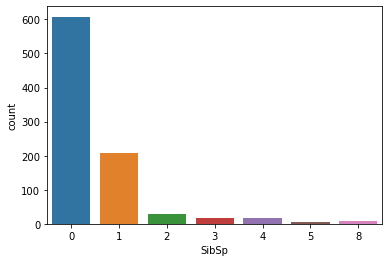

In [6]:
sns.countplot(x="SibSp", data=titanic_train)

<AxesSubplot:xlabel='Parch', ylabel='count'>

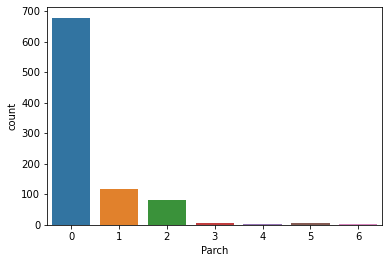

In [7]:
sns.countplot(x="Parch", data=titanic_train)

<AxesSubplot:xlabel='Parch', ylabel='Age'>

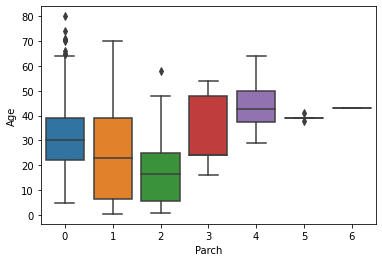

In [8]:
sns.boxplot(x="Parch", y="Age", data=titanic_train)

<AxesSubplot:xlabel='SibSp', ylabel='Age'>

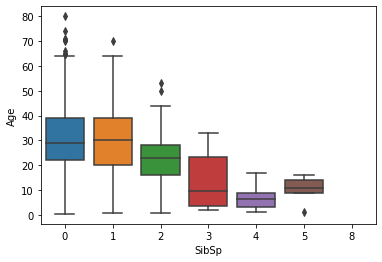

In [9]:
sns.boxplot(x="SibSp", y="Age", data=titanic_train)

In [10]:
len(titanic_train[(titanic_train["SibSp"] !=0) & (titanic_train["Age"].isnull())])

40

In [11]:
len(titanic_train[(titanic_train["SibSp"] ==0) & (titanic_train["Age"].isnull())])

137

In [12]:
len(titanic_train[(titanic_train["Parch"] !=0) & (titanic_train["Age"].isnull())])

20

In [13]:
len(titanic_train[(titanic_train["Parch"] ==0) & (titanic_train["Age"].isnull())])

157

In [14]:
titanic_train["Age"].mean()

29.69911764705882

In [15]:
titanic_train[titanic_train["SibSp"] !=0 ]["Age"].mean()

26.40707818930041

In [16]:
titanic_train[titanic_train["Parch"] !=0 ]["Age"].mean()

23.006062176165802

In [17]:
titanic_train[(titanic_train["Parch"] !=0) & (titanic_train["SibSp"] !=0)]["Age"].mean()

21.18190476190476

In [18]:
titanic_train[(titanic_train["Parch"] ==0) & (titanic_train["SibSp"] ==0)]["Age"].mean()

32.22029702970297

In [19]:
titanic_train[titanic_train["SibSp"] ==0 ]["Age"].mean()

31.39755838641189

In [20]:
titanic_train[titanic_train["Parch"] ==0 ]["Age"].mean()

32.17850287907869

In [21]:
#titanic_train = titanic_train.fillna(0)

In [22]:
def estimate_age(dataset):
    for i in range(len(dataset)):
        if str(dataset["Age"][i]) == "nan":
            if dataset["SibSp"][i] !=0:
                if dataset["Parch"][i] !=0:
                    mean = int(dataset[(dataset["Parch"] !=0) & (dataset["SibSp"] !=0)]["Age"].mean())
                    dataset["Age"][i] = mean                
                else:
                    mean = int(dataset[(dataset["Parch"] ==0) & (dataset["SibSp"] !=0)]["Age"].mean())
                    dataset["Age"][i] = mean 
            else: 
                mean = int(dataset[(dataset["Parch"] ==0) & (dataset["SibSp"] ==0)]["Age"].mean())
                dataset["Age"][i] = mean
    return dataset

In [23]:
titanic_train = estimate_age(titanic_train)

/Users/gajendrasahu/opt/anaconda3/envs/tensorflow20/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/gajendrasahu/opt/anaconda3/envs/tensorflow20/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/gajendrasahu/opt/anaconda3/envs/tensorflow20/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

/Users/gajendrasahu/opt/anaconda3/envs/tensorflow20/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/gajendrasahu/opt/anaconda3/envs/tensorflow20/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/gajendrasahu/opt/anaconda3/envs/tensorflow20/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

In [24]:
# Checksum Null Values
titanic_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
dtype: int64

In [25]:
titanic_train.dropna(axis=0, inplace=True)

In [26]:
# Checksum Null Values
titanic_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [27]:
titanic_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,21.0,1,2,S
889,1,1,male,26.0,0,0,C


### Analyze Data

In [28]:
titanic_train.Survived.unique()

array([0, 1])

In [29]:
type(titanic_train)

pandas.core.frame.DataFrame

### Convert String Data to Numeric Data

In [30]:
Pclass = pd.get_dummies(titanic_train["Pclass"], drop_first=True)
Pclass

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0


In [31]:
Sex = pd.get_dummies(titanic_train["Sex"], drop_first=True)
Sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [32]:
Embarked = pd.get_dummies(titanic_train["Embarked"], drop_first=True)
Embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


### Adding the Converted Data to Original Dataset

In [33]:
titanic_train = pd.concat([titanic_train, Pclass, Sex, Embarked], axis=1)

In [34]:
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,2,3,male,Q,S
0,0,3,male,22.0,1,0,S,0,1,1,0,1
1,1,1,female,38.0,1,0,C,0,0,0,0,0
2,1,3,female,26.0,0,0,S,0,1,0,0,1
3,1,1,female,35.0,1,0,S,0,0,0,0,1
4,0,3,male,35.0,0,0,S,0,1,1,0,1


### Drop the Columns with String values.

In [35]:
titanic_train = titanic_train.drop(labels=["Pclass", "Sex", "Embarked"], axis=1)
titanic_train.head()

,Survived,Age,SibSp,Parch,2,3,male,Q,S
0,0,22.0,1,0,0,1,1,0,1
1,1,38.0,1,0,0,0,0,0,0
2,1,26.0,0,0,0,1,0,0,1
3,1,35.0,1,0,0,0,0,0,1
4,0,35.0,0,0,0,1,1,0,1


### Train and Test Data Preperation

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x = titanic_train.drop(labels=["Survived"], axis=1).copy()
y = titanic_train["Survived"]
x.shape, y.shape

((889, 8), (889,))

In [38]:
x.head()

,Age,SibSp,Parch,2,3,male,Q,S
0,22.0,1,0,0,1,1,0,1
1,38.0,1,0,0,0,0,0,0
2,26.0,0,0,0,1,0,0,1
3,35.0,1,0,0,0,0,0,1
4,35.0,0,0,0,1,1,0,1


In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)

In [40]:
x_train

,Age,SibSp,Parch,2,3,male,Q,S
227,20.5,0,0,0,1,1,0,1
299,50.0,0,1,0,0,0,0,0
721,17.0,1,0,0,1,1,0,1
804,27.0,0,0,0,1,1,0,1
639,32.0,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...
650,32.0,0,0,0,1,1,0,1
730,29.0,0,0,0,0,0,0,1
265,36.0,0,0,1,0,1,0,1
136,19.0,0,2,0,0,0,0,1


### Feature Selection

In [41]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LinearRegression

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [43]:
def run_random_forest(x_train, x_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print("Accuracy on test set: ")
    print(accuracy_score(y_test, y_pred))

#### Linear Regression Estimate Coefficient

In [44]:
sel = SelectFromModel(LinearRegression())

In [45]:
sel.fit(x_train, y_train)

SelectFromModel(estimator=LinearRegression())

In [46]:
sel.get_support()

array([False, False, False,  True,  True,  True, False, False])

In [47]:
sel_feature = x.columns[sel.get_support()]
sel_feature

Index([2, 3, 'male'], dtype='object')

In [48]:
x_train_lin = sel.transform(x_train)
x_test_lin = sel.transform(x_test)

In [49]:
x_train_lin.shape, x_test_lin.shape

((711, 3), (178, 3))

In [50]:
%%time
# Transformed Dataset
run_random_forest(x_train_lin, x_test_lin, y_train, y_test)

Accuracy on test set: 
0.7865168539325843
CPU times: user 341 ms, sys: 62.3 ms, total: 404 ms
Wall time: 515 ms


In [51]:
%%time
# Original Dataset
run_random_forest(x_train, x_test, y_train, y_test)

Accuracy on test set: 
0.848314606741573
CPU times: user 377 ms, sys: 70.1 ms, total: 447 ms
Wall time: 548 ms


#### L1 Regularization (Lasso Regression)

In [52]:
sel = SelectFromModel(LogisticRegression(penalty="l1", C=0.1, solver="liblinear"))

In [53]:
sel.fit(x_train, y_train)
sel.get_support()

array([ True,  True, False, False,  True,  True, False, False])

In [54]:
sel_feature = x_train.columns[sel.get_support()]
sel_feature

Index(['Age', 'SibSp', 3, 'male'], dtype='object')

In [55]:
x_train_l1 = sel.transform(x_train)
x_test_l1 = sel.transform(x_test)

In [56]:
x_train_l1, x_test_l1

(array([[20.5,  0. ,  1. ,  1. ],
        [50. ,  0. ,  0. ,  0. ],
        [17. ,  1. ,  1. ,  1. ],
        ...,
        [36. ,  0. ,  0. ,  1. ],
        [19. ,  0. ,  0. ,  0. ],
        [32. ,  0. ,  1. ,  1. ]]),
 array([[34.  ,  0.  ,  0.  ,  0.  ],
        [65.  ,  0.  ,  0.  ,  1.  ],
        [20.  ,  0.  ,  1.  ,  1.  ],
        [14.  ,  0.  ,  1.  ,  0.  ],
        [33.  ,  1.  ,  0.  ,  0.  ],
        [30.5 ,  0.  ,  1.  ,  0.  ],
        [40.  ,  0.  ,  0.  ,  1.  ],
        [59.  ,  0.  ,  0.  ,  1.  ],
        [32.  ,  2.  ,  1.  ,  1.  ],
        [21.  ,  0.  ,  1.  ,  1.  ],
        [70.  ,  1.  ,  0.  ,  1.  ],
        [32.  ,  1.  ,  1.  ,  0.  ],
        [32.  ,  0.  ,  0.  ,  1.  ],
        [36.  ,  0.  ,  0.  ,  0.  ],
        [16.  ,  0.  ,  0.  ,  0.  ],
        [26.  ,  0.  ,  0.  ,  0.  ],
        [ 2.  ,  3.  ,  1.  ,  0.  ],
        [27.  ,  0.  ,  1.  ,  1.  ],
        [25.  ,  0.  ,  1.  ,  1.  ],
        [38.  ,  0.  ,  1.  ,  1.  ],
        [24.  ,  1.  

In [57]:
%%time
# Transformed Dataset
run_random_forest(x_train_l1, x_test_l1, y_train, y_test)

Accuracy on test set: 
0.8202247191011236
CPU times: user 379 ms, sys: 52.9 ms, total: 432 ms
Wall time: 662 ms


In [58]:
%%time
# Original Dataset
run_random_forest(x_train, x_test, y_train, y_test)

Accuracy on test set: 
0.848314606741573
CPU times: user 403 ms, sys: 64.1 ms, total: 467 ms
Wall time: 724 ms


#### L2 Regularization (Ridge Regression)

In [59]:
sel = SelectFromModel(LogisticRegression(penalty="l2", C=0.1, solver="liblinear"))
sel.fit(x_train, y_train)
sel.get_support()

array([False, False, False, False,  True,  True, False, False])

In [60]:
sel_feature = x_train.columns[sel.get_support()]
sel_feature

Index([3, 'male'], dtype='object')

In [61]:
x_train_l2 = sel.transform(x_train)
x_test_l2 = sel.transform(x_test)

In [62]:
%%time
# Transformed Dataset
run_random_forest(x_train_l2, x_test_l2, y_train, y_test)

Accuracy on test set: 
0.7865168539325843
CPU times: user 318 ms, sys: 68 ms, total: 386 ms
Wall time: 543 ms


In [63]:
%%time
# Original Dataset
run_random_forest(x_train, x_test, y_train, y_test)

Accuracy on test set: 
0.848314606741573
CPU times: user 321 ms, sys: 78.4 ms, total: 399 ms
Wall time: 402 ms


#### FScore and Chi

In [64]:
from sklearn.feature_selection import chi2

In [65]:
f_score = chi2(x_train, y_train)

In [66]:
p_value = pd.Series(f_score[1], index=x_train.columns)
p_value.sort_values(ascending=True, inplace=True)

In [67]:
p_value

male     1.979081e-17
3        7.022818e-09
Age      4.023957e-06
Parch    3.316673e-03
2        2.670250e-02
S        6.234437e-02
SibSp    2.757930e-01
Q        8.537758e-01
dtype: float64

In [68]:
x_train_f = x_train[["male", "Parch"]]
x_test_f = x_test[["male", "Parch"]]

In [69]:
%%time
run_random_forest(x_train_f, x_test_f, y_train, y_test)

Accuracy on test set: 
0.8033707865168539
CPU times: user 353 ms, sys: 75.2 ms, total: 429 ms
Wall time: 552 ms


### SVM 

In [70]:
from sklearn import svm
from sklearn import metrics
import seaborn as sns


Accuracy:  0.7921348314606742
Precision:  0.746031746031746
Recall:  0.6911764705882353
Confusion Matrix


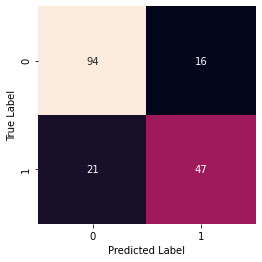

In [71]:
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)

print('Accuracy: ', metrics.accuracy_score(y_test, y_predict))
print('Precision: ', metrics.precision_score(y_test, y_predict))
print('Recall: ', metrics.recall_score(y_test, y_predict))

print('Confusion Matrix')

mat = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(mat, square = True, annot = True, fmt = 'd', cbar = False)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

As we can see the highest accuracy is gained by training the model on `'Age', 'male'` using `L1 Regularization (Lasso Regression)`

### Prepare Test Data

In [72]:
# x_train = x_train_l1.copy()
# x_train

In [73]:
# y_train = y_train.copy()
# y_train

#### Load Test Data

In [74]:
validation_test = pd.read_csv("data/Titanic - Machine Learning from Disaster/test.csv")

In [75]:
validation_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [76]:
validation_test.drop(labels=["Name", "Ticket", "Fare", "Cabin"], axis=1, inplace=True)

In [77]:
#validation_test = validation_test.fillna(0)

In [78]:
validation_test = estimate_age(validation_test)

/Users/gajendrasahu/opt/anaconda3/envs/tensorflow20/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/gajendrasahu/opt/anaconda3/envs/tensorflow20/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/gajendrasahu/opt/anaconda3/envs/tensorflow20/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

/Users/gajendrasahu/opt/anaconda3/envs/tensorflow20/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/gajendrasahu/opt/anaconda3/envs/tensorflow20/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/gajendrasahu/opt/anaconda3/envs/tensorflow20/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

In [79]:
validation_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

In [80]:
Pclass = pd.get_dummies(validation_test["Pclass"], drop_first=True)
Pclass.head()

,2,3
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1


In [81]:
Sex = pd.get_dummies(validation_test["Sex"], drop_first=True)
Sex.head()

,male
0,1
1,0
2,1
3,1
4,0


In [82]:
Embarked = pd.get_dummies(validation_test["Embarked"], drop_first=True)
Embarked.head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [83]:
validation_test = pd.concat([validation_test, Pclass, Sex, Embarked], axis=1)

In [84]:
validation_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,2,3,male,Q,S
0,892,3,male,34.5,0,0,Q,0,1,1,1,0
1,893,3,female,47.0,1,0,S,0,1,0,0,1
2,894,2,male,62.0,0,0,Q,1,0,1,1,0
3,895,3,male,27.0,0,0,S,0,1,1,0,1
4,896,3,female,22.0,1,1,S,0,1,0,0,1


In [85]:
validation_test = validation_test.drop(labels=["Pclass", "Sex", "Embarked"], axis=1)
validation_test.head()

,PassengerId,Age,SibSp,Parch,2,3,male,Q,S
0,892,34.5,0,0,0,1,1,1,0
1,893,47.0,1,0,0,1,0,0,1
2,894,62.0,0,0,1,0,1,1,0
3,895,27.0,0,0,0,1,1,0,1
4,896,22.0,1,1,0,1,0,0,1


In [86]:
type(x_test)

pandas.core.frame.DataFrame

In [87]:
clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
clf.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [88]:
x_train

,Age,SibSp,Parch,2,3,male,Q,S
227,20.5,0,0,0,1,1,0,1
299,50.0,0,1,0,0,0,0,0
721,17.0,1,0,0,1,1,0,1
804,27.0,0,0,0,1,1,0,1
639,32.0,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...
650,32.0,0,0,0,1,1,0,1
730,29.0,0,0,0,0,0,0,1
265,36.0,0,0,1,0,1,0,1
136,19.0,0,2,0,0,0,0,1


In [89]:
validation_test

,PassengerId,Age,SibSp,Parch,2,3,male,Q,S
0,892,34.5,0,0,0,1,1,1,0
1,893,47.0,1,0,0,1,0,0,1
2,894,62.0,0,0,1,0,1,1,0
3,895,27.0,0,0,0,1,1,0,1
4,896,22.0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
413,1305,29.0,0,0,0,1,1,0,1
414,1306,39.0,0,0,0,0,0,0,0
415,1307,38.5,0,0,0,1,1,0,1
416,1308,29.0,0,0,0,1,1,0,1


In [90]:
# validation_test = validation_test[["PassengerId", "Age", "SibSp", 3, "male"]]
# validation_test

In [91]:
validation_test.iloc[:,1:].values

array([[34.5,  0. ,  0. , ...,  1. ,  1. ,  0. ],
       [47. ,  1. ,  0. , ...,  0. ,  0. ,  1. ],
       [62. ,  0. ,  0. , ...,  1. ,  1. ,  0. ],
       ...,
       [38.5,  0. ,  0. , ...,  1. ,  0. ,  1. ],
       [29. ,  0. ,  0. , ...,  1. ,  0. ,  1. ],
       [25. ,  1. ,  1. , ...,  1. ,  0. ,  0. ]])

In [92]:
# person = []
# y_test = []
# for i in range(len(validation_test)):
#     person_id = validation_test.iloc[i,0:1].values
#     x_test = validation_test.iloc[i,1:].values
#     x_test = x_test.reshape(1, -1)
#     y_pred = clf.predict(x_test)  
#     y_test.append(y_pred)
#     person.append(person_id)
#     print(str(person_id) + " " + str(y_pred))

In [93]:
x_test = validation_test.iloc[:,1:].values
PassengerId = validation_test.PassengerId
y_pred = clf.predict(x_test)
df = pd.DataFrame({"PassengerId":PassengerId, "Survived":y_pred})
df.to_csv('data/Titanic - Machine Learning from Disaster/gender_submission.csv',index = False)
print(df)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         1
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]


In [94]:
x_test

array([[34.5,  0. ,  0. , ...,  1. ,  1. ,  0. ],
       [47. ,  1. ,  0. , ...,  0. ,  0. ,  1. ],
       [62. ,  0. ,  0. , ...,  1. ,  1. ,  0. ],
       ...,
       [38.5,  0. ,  0. , ...,  1. ,  0. ,  1. ],
       [29. ,  0. ,  0. , ...,  1. ,  0. ,  1. ],
       [25. ,  1. ,  1. , ...,  1. ,  0. ,  0. ]])